In [1]:
from new_idea.prediction import Prediction
from new_idea.values import Values
from new_idea.metric import Metric
from new_idea.pdfs import PDFs
from new_idea.pdf import PDF
import numpy as np
from typing import List
from matplotlib import pyplot
from tqdm import tqdm
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

In [2]:
predictions = []
# Add False Negatives
for p in np.linspace(0, 0.3, 100):
    prediction = Prediction(
        "negative", "positive", p, None)
    predictions.append(prediction)

# Add False Positives
for p in np.linspace(0, 0.3, 100):
    prediction = Prediction(
        "positive", "negative", p, None)
    predictions.append(prediction)

# Add True Negatives
for p in np.linspace(0.7, 1.0, 100):
    prediction = Prediction(
        "negative", "negative", p, None)
    predictions.append(prediction)

# Add True Positives
for p in np.linspace(0.7, 1.0, 100):
    prediction = Prediction(
        "positive", "positive", p, None)
    predictions.append(prediction)

In [3]:
kde = PDFs.estimator(predictions)
pdf = PDF(predictions, 1.0, kde)
print( pdf.integral(min=0.0, max=1.0))
print( pdf.integral(min=0.0, max=0.5))
print( pdf.integral(min=0.0, max=0.25))
print( pdf.integral(min=0.0, max=0.0))
print( pdf.integral(min=0.25, max=1.0))

c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
INFO:root:KDE optimal bandwidths: [0.01415169]


0.9787979288370952
0.4893989644185475
0.40427446663252137
0.0
0.5743584674295481


INFO:root:Fraction correct: 0.5
INFO:root:Fraction incorrect: 0.5
INFO:root:KDE optimal bandwidths: [0.01415933]
INFO:root:KDE optimal bandwidths: [0.01415933]


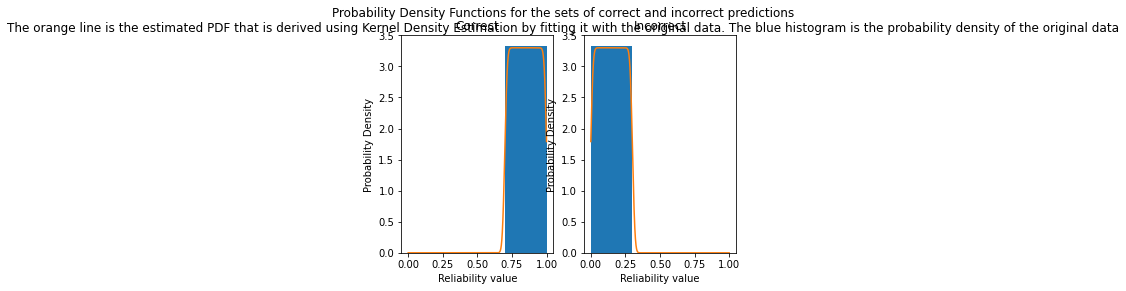

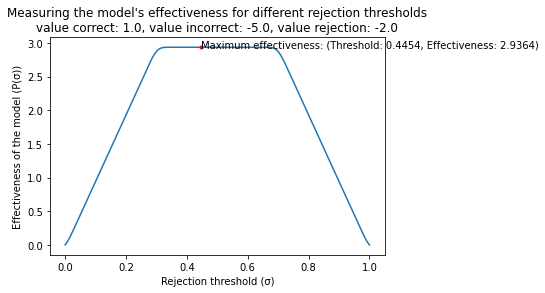

In [4]:
values = Values(value_correct=1.0, value_incorrect=-5.0, value_rejection=-2.0)
metric = Metric(values, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()

INFO:root:Fraction correct: 0.8353014294592915
INFO:root:Fraction incorrect: 0.16469857054070852
c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
INFO:root:KDE optimal bandwidths: [0.0055295]
INFO:root:KDE optimal bandwidths: [0.00927314]


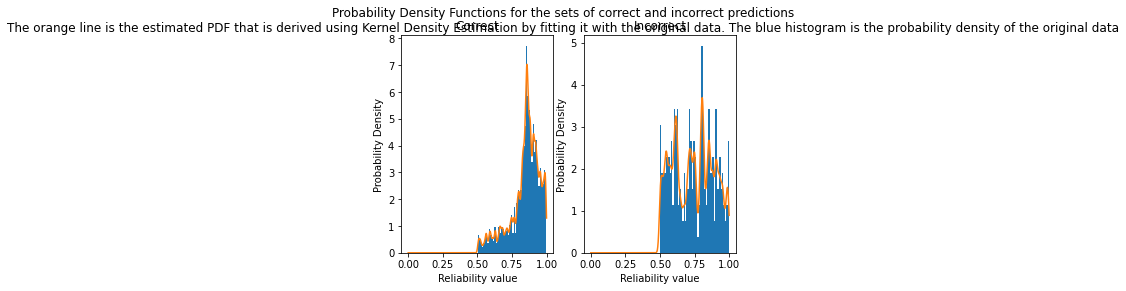

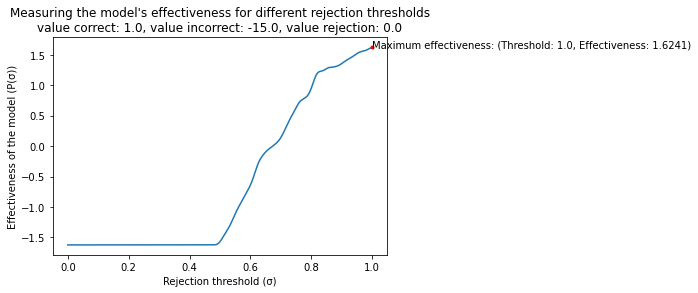

In [5]:
predictions = Prediction.load("input/cnn-hoseem-calibrated.p")
values = Values(value_correct=1.0, value_incorrect=-15.0, value_rejection=0.0)
metric = Metric(values, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()